In [73]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from keras.models import Sequential
from keras.layers import Dense

%matplotlib inline

In [74]:
data = pd.read_csv('../input/neutron-moderator/neutron_moderator.csv')
print(data.shape)
data.head()

(1800, 4)


,"time, 10^(-5) c",colisions,Material,target
0,0.060134,18.0,Water,0.0
1,0.015265,11.0,Water,0.0
2,0.058799,17.0,Water,0.0
3,0.047027,14.0,Water,0.0
4,0.018141,10.0,Water,0.0


In [75]:
data.nunique()

time, 10^(-5) c    1800
colisions            54
Material              3
target                3
dtype: int64

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time, 10^(-5) c  1800 non-null   float64
 1   colisions        1800 non-null   float64
 2   Material         1800 non-null   object 
 3   target           1800 non-null   float64
dtypes: float64(3), object(1)
memory usage: 56.4+ KB


In [77]:
data.columns.values

array(['time, 10^(-5) c', 'colisions', 'Material', 'target'], dtype=object)

In [78]:
x = data[['time, 10^(-5) c', 'colisions']]
y = data['target']

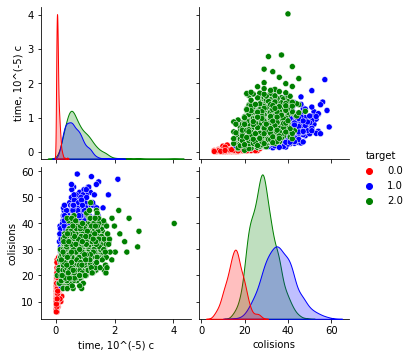

In [79]:
sns.pairplot(data,kind='scatter',hue='target',palette=['red','blue','green'])

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=33)

In [81]:
x_train = np.asarray(x_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)
y_train = np.asarray(y_train)

## Logistic Regression

In [82]:
reg = LogisticRegression(random_state=0)
reg.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [83]:
predict = reg.predict(x_test)
print(reg.score(x_test,y_test)*100)
print("--"*20)

for i in range(5):
    print(predict[i],'==>',y_test[i])

82.22222222222221
----------------------------------------
1.0 ==> 1.0
2.0 ==> 1.0
1.0 ==> 2.0
2.0 ==> 2.0
2.0 ==> 1.0


## Decision Tree

In [84]:
clf = DecisionTreeClassifier(random_state=100,max_depth=5,criterion='entropy')
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=100)

In [85]:
predict = clf.predict(x_test)
print(clf.score(x_test,y_test)*100)
print("--"*20)

for i in range(5):
    print(predict[i],'==>',y_test[i])

80.66666666666666
----------------------------------------
2.0 ==> 1.0
2.0 ==> 1.0
1.0 ==> 2.0
2.0 ==> 2.0
2.0 ==> 1.0


## Random Forest

In [86]:
clf = RandomForestClassifier(random_state=100,max_depth=5,criterion='gini',n_estimators=200)
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=100)

In [87]:
predict = clf.predict(x_test)
print(clf.score(x_test,y_test)*100)
print("--"*20)

for i in range(5):
    print(predict[i],'==>',y_test[i])

82.22222222222221
----------------------------------------
1.0 ==> 1.0
2.0 ==> 1.0
1.0 ==> 2.0
2.0 ==> 2.0
2.0 ==> 1.0


## Neural Network

In [94]:
model = Sequential()
model.add(Dense(100, input_dim= 2 , activation='relu'))
model.add(Dense(75, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               300       
_________________________________________________________________
dense_13 (Dense)             (None, 75)                7575      
_________________________________________________________________
dense_14 (Dense)             (None, 50)                3800      
_________________________________________________________________
dense_15 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_16 (Dense)             (None, 10)                260       
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 33        
Total params: 13,243
Trainable params: 13,243
Non-trainable params: 0
__________________________________________________

In [90]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [91]:
history = model.fit(x_train, y_train, epochs=20, batch_size=2,validation_data= (x_test,y_test) )

Epoch 1/20
675/675 [==============================] - 2s 2ms/step - loss: 0.9454 - accuracy: 0.5375 - val_loss: 0.7078 - val_accuracy: 0.6489
Epoch 2/20
675/675 [==============================] - 1s 2ms/step - loss: 0.6831 - accuracy: 0.6328 - val_loss: 0.5521 - val_accuracy: 0.6644
Epoch 3/20
675/675 [==============================] - 1s 2ms/step - loss: 0.5954 - accuracy: 0.7059 - val_loss: 0.5092 - val_accuracy: 0.7667
Epoch 4/20
675/675 [==============================] - 1s 2ms/step - loss: 0.5421 - accuracy: 0.7348 - val_loss: 0.5017 - val_accuracy: 0.7644
Epoch 5/20
675/675 [==============================] - 1s 2ms/step - loss: 0.5399 - accuracy: 0.7526 - val_loss: 0.5038 - val_accuracy: 0.7378
Epoch 6/20
675/675 [==============================] - 1s 2ms/step - loss: 0.5358 - accuracy: 0.7521 - val_loss: 0.5251 - val_accuracy: 0.7511
Epoch 7/20
675/675 [==============================] - 1s 2ms/step - loss: 0.4991 - accuracy: 0.7735 - val_loss: 0.4266 - val_accuracy: 0.8200
Epoch 

In [92]:
pred = model.predict_classes(x_test)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [93]:
df = pd.DataFrame({'Perdict':pred,'True':y_test})
df.head(10)

,Perdict,True
0,1,1.0
1,2,1.0
2,1,2.0
3,2,2.0
4,2,1.0
5,2,2.0
6,0,0.0
7,2,2.0
8,2,1.0
9,0,0.0


In [ ]:

#scaler = MinMaxScaler(feature_range=(-1, 1))

#x_train = scaler.fit_transform(x_train)
#x_test = scaler.fit_transform(x_test)

#y_train = scaler.fit_transform(y_train)
#y_test = scaler.transform(y_test)